<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sieć-klasyfikująca-RBF" data-toc-modified-id="Sieć-klasyfikująca-RBF-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sieć klasyfikująca RBF</a></span><ul class="toc-item"><li><span><a href="#Neuron-RBF" data-toc-modified-id="Neuron-RBF-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Neuron RBF</a></span></li><li><span><a href="#Wizualizacja-funkcji-RBF" data-toc-modified-id="Wizualizacja-funkcji-RBF-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Wizualizacja funkcji RBF</a></span></li><li><span><a href="#Rozmycie-funkcji-RBF" data-toc-modified-id="Rozmycie-funkcji-RBF-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rozmycie funkcji RBF</a></span></li><li><span><a href="#Centrum-funkcij-RBF" data-toc-modified-id="Centrum-funkcij-RBF-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Centrum funkcij RBF</a></span></li><li><span><a href="#Wielowymiarowa-funkcja-RBF" data-toc-modified-id="Wielowymiarowa-funkcja-RBF-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Wielowymiarowa funkcja RBF</a></span></li><li><span><a href="#Przykładowy-zbiór-danych-2D" data-toc-modified-id="Przykładowy-zbiór-danych-2D-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Przykładowy zbiór danych 2D</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie:-implementacja-sieci-RBF-do-klasyfikacji" data-toc-modified-id="Ćwiczenie:-implementacja-sieci-RBF-do-klasyfikacji-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Ćwiczenie: implementacja sieci RBF do klasyfikacji</a></span></li><li><span><a href="#Test-metody-init_centers()" data-toc-modified-id="Test-metody-init_centers()-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Test metody init_centers()</a></span></li><li><span><a href="#Test-metody-hidden_activation()" data-toc-modified-id="Test-metody-hidden_activation()-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Test metody hidden_activation()</a></span></li></ul></li><li><span><a href="#Test-metody-fit()" data-toc-modified-id="Test-metody-fit()-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Test metody fit()</a></span></li><li><span><a href="#Granica-decyzyjna" data-toc-modified-id="Granica-decyzyjna-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Granica decyzyjna</a></span></li><li><span><a href="#Wagi-sieci" data-toc-modified-id="Wagi-sieci-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Wagi sieci</a></span></li><li><span><a href="#Wizualizacja-wyjść-sieci" data-toc-modified-id="Wizualizacja-wyjść-sieci-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Wizualizacja wyjść sieci</a></span></li><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Ćwiczenie</a></span></li><li><span><a href="#Zadanie:-Klasyfikator-RBF-dla-danych-digits" data-toc-modified-id="Zadanie:-Klasyfikator-RBF-dla-danych-digits-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Zadanie: Klasyfikator RBF dla danych digits</a></span></li></ul></li></ul></div>

# Sieć klasyfikująca RBF


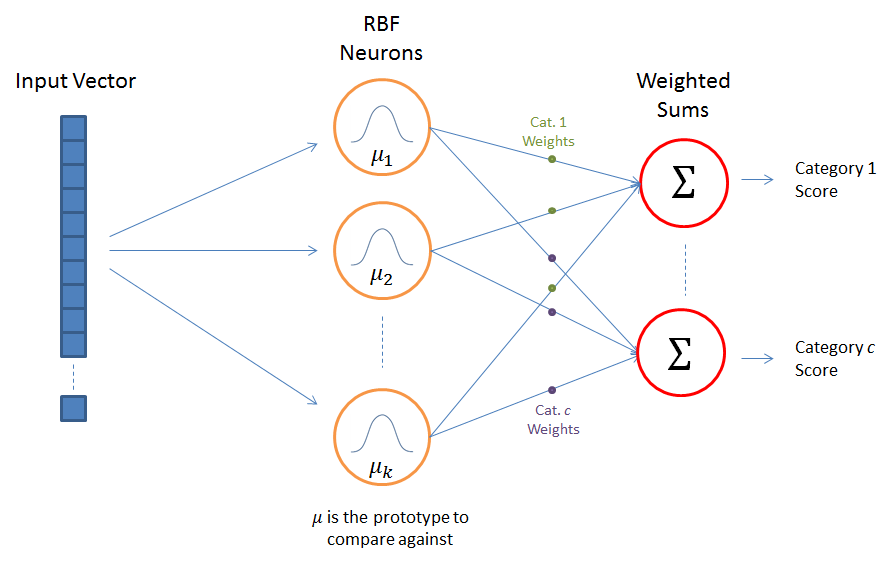



## Neuron RBF

* neuron reprezentuje prototyp
* poziom aktywacji zależy od odległości od centrum funkcji RBF
* funkcja aktywacji
$$
\varphi(x)=e^{-\beta\|x-\mu\|^2} \qquad \text{gdzie} \qquad \beta=\frac{1}{2\sigma^2}
$$

In [ ]:
import numpy as np

def gauss(x, center, sigma=1.0):

    betas =  1.0 / (2.0 * sigma**2)
    diffs = x - center
    dist = np.sum(diffs**2, axis=1)
    z = np.exp(-betas * dist)
    return z

## Wizualizacja funkcji RBF

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-8, 8, 100).reshape([100, 1])
y = gauss(x, center=0, sigma=1)

plt.plot(x, y)
plt.show()

## Rozmycie funkcji RBF

In [ ]:
x = np.linspace(-8, 8, 100).reshape([100, 1])

for sigma in (0.5, 1.0, 2.0):
    y = gauss(x, center=0, sigma=sigma)
    plt.plot(x, y, label='sigma=%.1f' % sigma)
plt.legend()
plt.show()

## Centrum funkcij RBF

In [ ]:
x = np.linspace(-8, 8, 100).reshape([100, 1])

for center in (-3, 0.0, 5.0):
    y = gauss(x, center=center, sigma=1.0)
    plt.plot(x, y, label='center=%.1f' % center)
plt.legend()
plt.show()

## Wielowymiarowa funkcja RBF





In [ ]:
x = np.array([ [ 1, 2  ], [ -5, 0 ] ])
center = np.array([ 1, 1])
sigma = 1

gauss(x, center, sigma)

In [ ]:
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
x_flat, y_flat = x.ravel(), y.ravel()
xy = np.array( [x_flat, y_flat] ).T

center = np.array([-1.0, 3.0])
z_flat = gauss(xy, center, sigma=2)

z = z_flat.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x, y, z, color ='green')
plt.show()

## Przykładowy zbiór danych 2D

* plik [dane/dataset.csv](dane/dataset.csv)
* dane pochodzą z kursu uczenia maszynowego Andrew Ng na Coursera [Supervised Machine Learning: Regression and Classification](https://www.coursera.org/learn/machine-learning)

In [ ]:
import matplotlib.pyplot as plt

data = np.loadtxt('dane/dataset.csv',  delimiter=',')

X = data[:, :2]
y = data[:, 2] - 1 

print('Ilosc przypadkow: ', X.shape[0])
print('Ilośc zmienneych: ', X.shape[1])
print('Liczebnośc klas: ' ,  str(np.bincount(y.astype(int))))

In [ ]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.5)
plt.show()

### Ćwiczenie: implementacja sieci RBF do klasyfikacji

Zaimplementuj klasyfikator RBF korzystając z poniższego szablonu klasy [RBFClassifier.py](RBFClassifier.py)  

Parametry konstruktora: 
  * ``n_hidden`` liczba neuronów warstwy ukrytej 
  * ``sigma`` wartość rozmycia funkcji radialnych
  
**Algorytm uczenia**:
1. Ustalenie centrów funkcji radialnych (metoda ``init_centers(X,y)``).   
Jako centra wybieramy ``n_hidden`` losowych wektorów treningowych.
2. Ustalenie rozmyć funkcji radialnych (metoda ``init_sigmas(X, y)``).  
Dla każdej funkcji radialnej używamy stałego rozmycia ``sigma``.
3. Uczenie wag warstwy wyjściowej (metoda ``update_weights(X, y)``).  
Wagi i wyrazy wolne ustalone na podstawie rozwiązania układu równań $\mathbf{W}\mathbf{Z} + \mathbf{b}= \mathbf{y}$, gdzie $\mathbf{Z}$ to macierz aktywacji warstwy ukrytej dla zbioru $\mathbf{X}$.  
Stąd:

$$ \mathbf{W}' = \left( \mathbf{Z}'^T \mathbf{Z'}\right)^{-1}\mathbf{Z'}\mathbf{y} $$
gdzie $\mathbf{W}'$ jest macierzą wag warstwy wyjściowej $\mathbf{W}$ rozszerzoną o wektor $\mathbf{b}$, a macierz $\mathbf{Z}'$ jest macierzą aktywacji warstwy ukrytej $\mathbf{Z}$ rozszerzoną o wektor jednostkowy.

**Zaimplementuj brakujące metody:**
  * ``init_centers(X, y)`` ustala ``n_hidden`` losowych prototypów w macierzy ``centers``
  * ``init_sigmas(X, y)`` ustala dla każdej funkcji radialnej rozmycie ``sigma``
  * ``update_weights(X, y)`` ustala macierz wag $\mathbf{W}$ oraz wektor wyrazów wolnych $\mathbf{b}$ neuronów wyjściowych.
  * ``hidden_activation(X)`` zwraca aktywację warstwy ukrytej
  * ``output_activation(X)`` zwraca aktywację warstwy wyjściowej

In [ ]:
from sklearn.base import BaseEstimator

class RBFClassifier(BaseEstimator):
    
    def __init__(self, n_hidden=10, sigma=1):
        
        self.sigma = sigma
        self.n_hidden = n_hidden   

    def init_centers(self, X, y):
        # ustaw pozycje centrow, macierz o kształscie [ n_hidden, X.shape[1]]

        return self

    def init_sigmas(self, X, y):
        # ustaw rozycia dla funkcji radialnych, wektor o długości [ n_hidden ]

        return self

    def update_weights(self, X, y):
        # ustaw macierz wag W i wektor wyrazów wolbych b dla warstwy wyjściowej
        # macierz W o kształcie [n_hidden, n_outputs], wektor b o długości [n_outputs]

        return self

    def hidden_activation(self, X):
        # zwraca macierz aktywacji warstwy ukrytej, macierz o kształcie [X.shape[0], n_hidden]

        return 

    def output_activation(self, X):
        # zwraca macierz aktywacji warstwy wyjściowj, macierz o kształcie [X.shape[0], n_outputs]

        return 

    def fit(self, X, y):
        self.init_centers(X, y)
        self.init_sigmas(X, y)
        self.update_weights(X, y)
        return self

    def predict(self, X):
        return self.output_activation(X).argmax(axis=1)

    def score(self, X, y):
        return (self.predict(X) == y).mean()

In [ ]:
# Rozwiązanie

class RBF1(RBFClassifier):
    
    def init_centers(self, X, y):
        # ustaw pozycje centrów, macierz o kształcie [ n_hidden, X.shape[1]]

        return self

    def init_sigmas(self, X, y):
        # ustaw rozmycia dla funkcji radialnych, wektor o długości [ n_hidden ]

        return self

    def update_weights(self, X, y):
        # ustaw macierz wag W i wektor wyrazów wolnych b dla warstwy wyjściowej
        # macierz W o kształcie [n_hidden, n_outputs], wektor b o długości [n_outputs]

        return self

    def hidden_activation(self, X):
        # zwraca macierz aktywacji warstwy ukrytej, macierz o kształcie [X.shape[0], n_hidden]

        return 

    def output_activation(self, X):
        # zwraca macierz aktywacji warstwy wyjściowej, macierz o kształcie [X.shape[0], n_outputs]

        return 

### Test metody init_centers()




In [ ]:
rbf1 = RBF1(n_hidden=20, sigma=1)
rbf1.init_centers(X, y)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.5)
plt.plot(rbf1.centers[:, 0], rbf1.centers[:, 1], 'ok', mfc='w', markersize=8)
plt.show()
print(rbf1.centers)

### Test metody hidden_activation()

In [ ]:
rbf1 = RBF1(n_hidden=5, sigma=0.3)
rbf1.init_centers(X, y)
rbf1.init_sigmas(X, y)

x1, y1 = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
xy1 = np.array( [x1.ravel(), y1.ravel()] ).T

z_flat = rbf1.hidden_activation(xy1)
z_flat = z_flat.sum(axis=1)   # suma funkcji RBF
z = z_flat.reshape(x1.shape)

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x1, y1, z, color ='green')
plt.show()

## Test metody fit()

In [ ]:
rbf1 = RBF1(n_hidden=20, sigma=1)
rbf1.fit(X, y)
print('Poprawność trening: ', rbf1.score(X, y))

## Granica decyzyjna

In [ ]:
from utils import plot_decision_regions

rbf1 = RBF1(n_hidden=20, sigma=1)
rbf1.fit(X, y)

plot_decision_regions(X, y, rbf1)
plt.plot(rbf1.centers[:, 0], rbf1.centers[:, 1], 'ok', mfc='w', markersize=8)
plt.show()

## Wagi sieci 

In [ ]:
print('W=\n', rbf1.W)
print('b=\n', rbf1.b)

## Wizualizacja wyjść sieci

In [ ]:
x1, y1 = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
xy1 = np.array( [x1.ravel(), y1.ravel()] ).T

Z_flat = rbf1.output_activation(xy1)

output=0   # output=1 jest symetryczny
Z1 = Z_flat[:, output].reshape(x1.shape)

plt.plot(X[y == 0, 0], X[y == 0, 1], 'or', alpha=0.1)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ob', alpha=0.1)
plt.contourf(x1, y1, Z1, alpha=0.3)
plt.plot(rbf1.centers[:, 0], rbf1.centers[:, 1], 'ok', mfc='w', markersize=8)
plt.colorbar()
plt.show()

## Ćwiczenie

Sprawdź wpływ parametrów ``n_hidden`` i ``sigma`` na jakość uzyskiwanych wyników:

* **n_hidden**: porównaj wynika dla liczby funkcji radialnych od 2 do 1000 przy ustalonej wartości ``sigma=1`` 
* **sigma**: porównaj wyniki dla różnych wartości rozmycia od bardzo małych (0.01) do dużych (2.0) przy ustalonej liczbie neuronów ukrytych 

Ocenę jakości modelu wykonaj z użyciem walidacji krzyżowej (np. za pomocą przeszukiwania siatką ``GridSearchCV``)

In [ ]:
from sklearn.model_selection import GridSearchCV

## Rozwiązanie



## Zadanie: Klasyfikator RBF dla danych digits


Zaimplementuj sieć RBF do zadań klasyfikacji posiadającą następujący algorytm uczenia: 
 
1. Ustalenie centrów funkcji radialnych (metoda ``init_centers(X,y)``) za pomocą algorytmu k-średnich.   
W tym celu można skorzystać z algorytmu [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
2. Ustalenie rozmyć funkcji radialnych (metoda ``init_sigmas(X, y)``).  
Wartość rozmycia $\sigma_k$ dla każdej funkcji radialnej jest dobierana jako średnia odległość między wektorami treningowymi związanymi z centrum $k$
$$
\sigma_k=\frac{1}{m} \sum_{i=1}^m\left\|x_i-\mu_k\right\|
$$
Wskazówka: 1) metoda ``predict(X)`` klasy ``KMeans`` zwraca wektor określający przynależność do centrów. 2) funkcja [scipy.spatial.distance.pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) oblicza odległości między wierszami macierzy.
3. Uczenie wag warstwy wyjsciowej (metoda ``update_weights(X, y)``).  
Wagi i wyrazy wolne ustalone na podstawie rozwiązania układu równań $\mathbf{W}\mathbf{Z} + \mathbf{b}= \mathbf{y}$.

$$ \mathbf{W}' = \left( \mathbf{Z}'^T \mathbf{Z'}\right)^{-1}\mathbf{Z'}\mathbf{y} $$


Zastosuj uzyskany algorytm RBF do klasyfikacji zbioru danych ``digits`` (zob. [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)).

```python
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
```
Znajdź najskuteczniejszy model klasyfikacji dobierając odpowiednią ilość neuronów ukrytych. Ocenę modeli wykonaj z użyciem  walidacji krzyżowej (np. za pomocą przeszukiwania siatką ``GridSearchCV``). 

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

